# FINAL PROJECT 4 KAMPUS MERDEKA - KELOMPOK 4
NAMA KELOMPOK :
- ALFENDO RIZKY SYACHPUTRA
- SAVITRI DYAH AYU PITALOKA
- SYAIMA RADESTYA

## 1. Perkenalan (Overview)
***
#### **Latar Belakang**
Bank adalah sebuah lembaga intermediasi keuangan yang bertugas menghimpun dana dari masyarakat dan menyalurkan kembali dana tersebut ke masyarakat serta memberikan jasanya dalam alur pembayaran dan peredaran uang. Pada umumnya Bank dikenal sebagai lembaga keuangan yang kegiatan utamanya menerima simpanan, giro, tabungan dan deposito. Bank juga dikenal sebagai tempat untuk meminjam uang (kredit) bagi masyarakat yang membutuhkannya. Dengan adanya lembaga keuangan maupun non keuangan yang menjadi pilar perekonomian di Indonesia menjadikan banyak lembaga keuangan yang tumbuh di berbagai daerah. Bank Perkreditan Rakyat merupakan salah satu lembaga keuangan yang ada di Indonesia.

Persaingan antar-bank saat ini menjadi sangat tinggi membuat setiap perusahaan harus memiliki strategi pemasaran produk perbankannya. Segmentasi pasar adalah salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. Alternatif strategi terhadap kegiatan pemasaran yang dilakukan sangat diperlukan agar perusahaan semakin tumbuh dan berkembang. Strategi pemasaran yang tepat dengan menetapkan segementasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

#### **Dataset**
Dataset yang digunakan pada project ini yaitu Credit Card Dataset yang tersedia dari website kaggle melalui [link berikut](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download)

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut yaitu

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. ANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. CHASES - Amount of purchases made from account
5. FFPURCHASES - Maximum purchase amount done in one-go
6. TALLMENTSPURCHASES - Amount of purchase done in installment
7. ADVANCE - Cash in advance given by the user
8. CHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. OFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. HASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. ADVANCEFREQUENCY - How frequently the cash in advance being paid
12. ADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

#### **Objective yang ingin dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

## 2. Import Library yang Dibutuhkan
***

In [127]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading
***
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

In [128]:
# Melakukan loading data dengan menggunakan pandas
df = pd.read_csv("CC GENERAL.csv")

In [129]:
# Melakukan setting untuk menampilkan semua kolom pada data
pd.set_option("display.max_columns", None)

In [130]:
# Melihat 5 baris teratas pada dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [131]:
# Melihat 5 baris terbawah dari dataset
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [132]:
# Melihat dimensi dataset
df.shape

(8950, 18)

In [133]:
# Melihat informasi (kolom, baris, tipe data) pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [134]:
# Melihat rincian nama kolom pada dataset
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [135]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['CUST_ID'] 
 numerical:  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


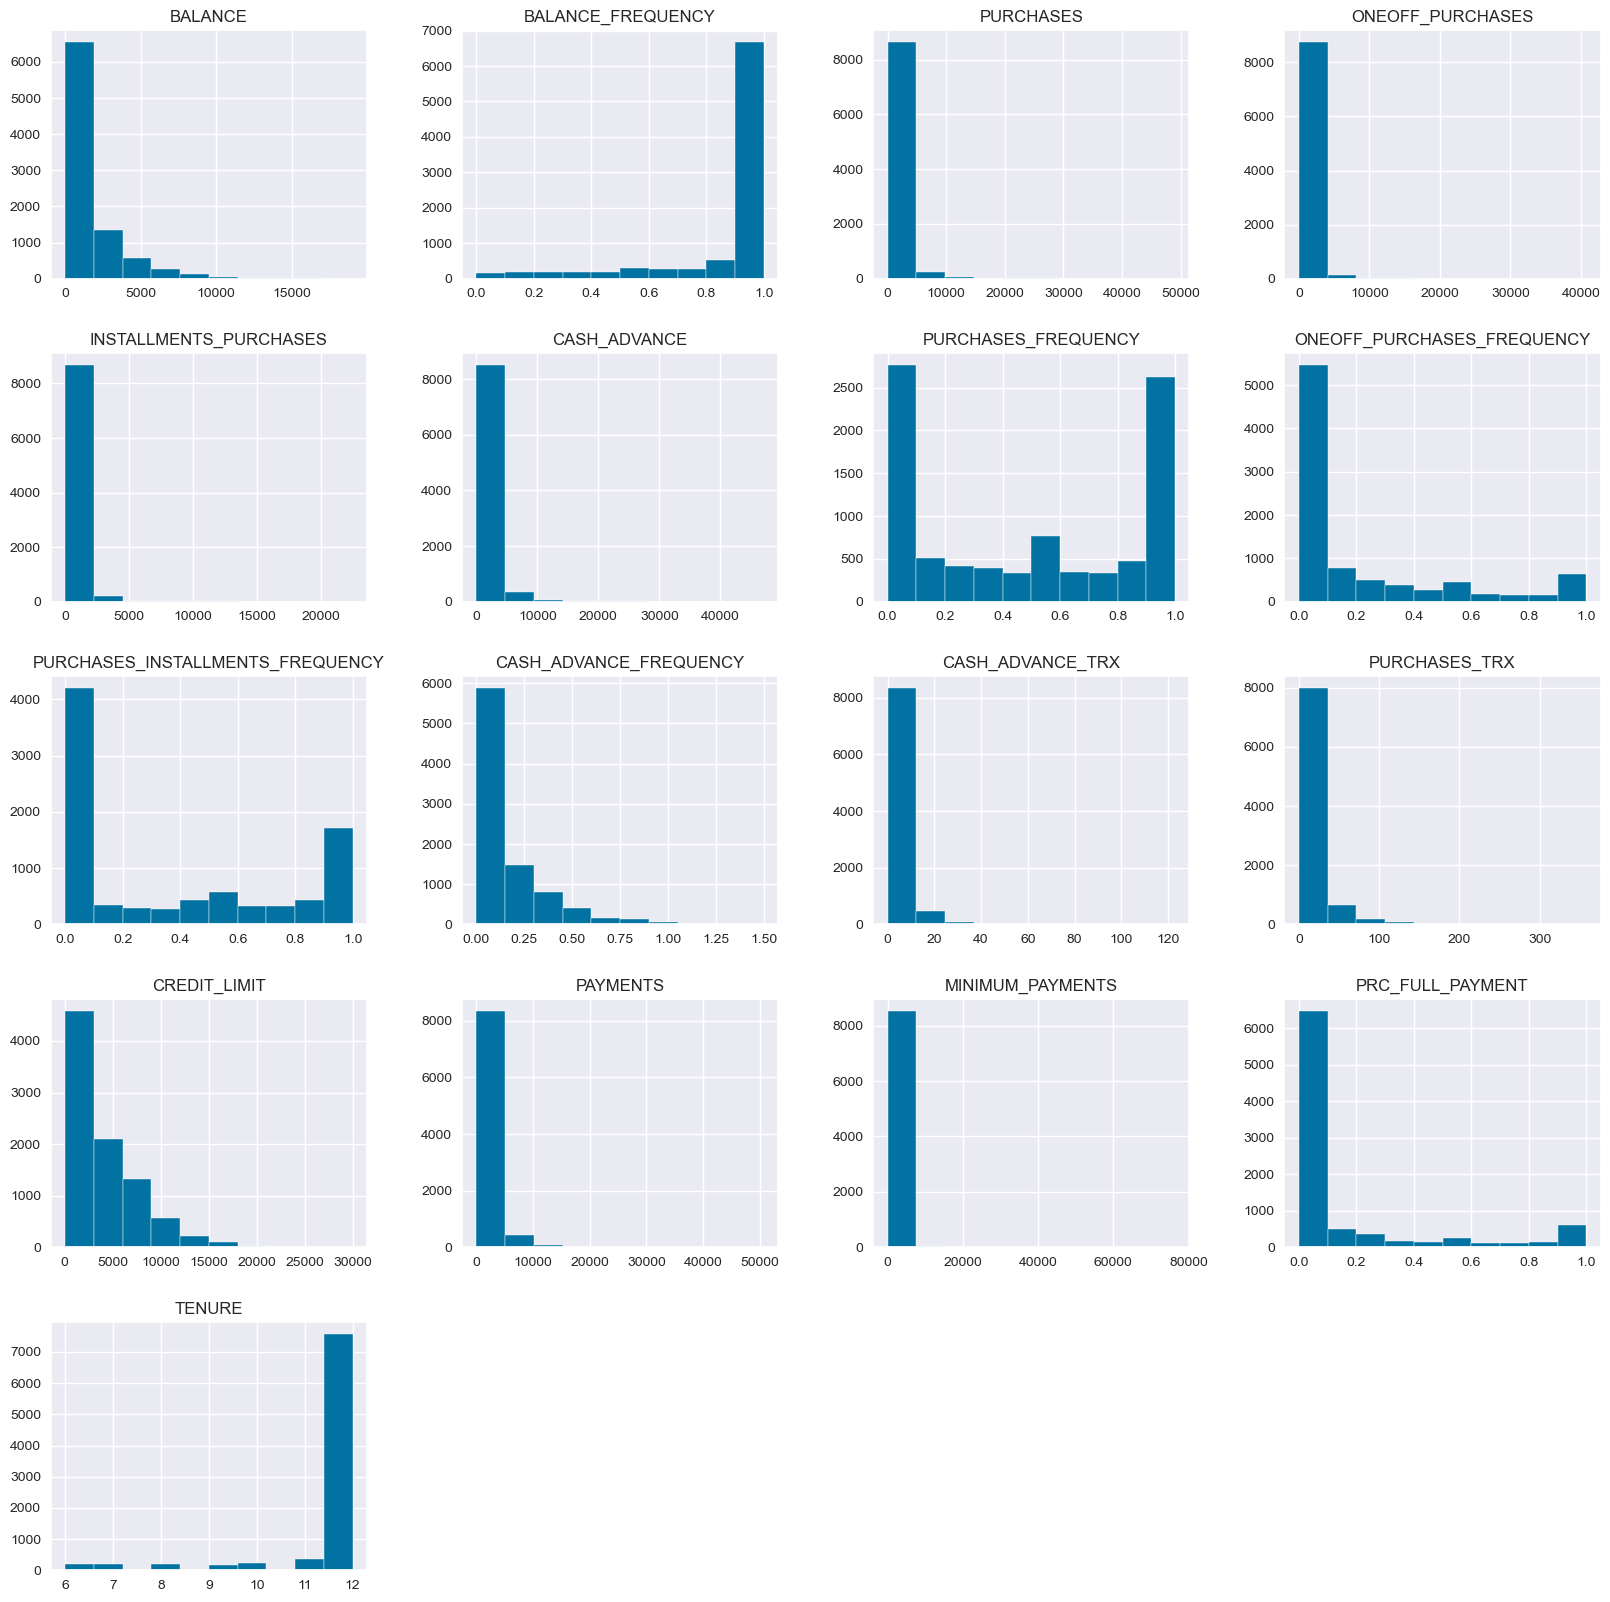

In [136]:
# Melihat distribusi pada atribut numerik
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

- Berdasarkan histogram terlihat bahwa tidak terdapat atribut yang berdistribusi normal dan atribut yang memiliki skewness terendah, yaitu atribut PURCHASES_FREQUENCY.

In [137]:
# Mengecek apakah pada dataset terdapat missing value
df.isnull().values.any()

True

In [138]:
# Melihat statistik deskriptif dari tiap atribut yang bertipe numerik
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [139]:
# Melihat statistik deskriptif dari tiap atribut yang bertipe object
df.describe(include='O').T

,count,unique,top,freq
CUST_ID,8950,8950,C10001,1


In [140]:
# Melihat banyaknya unique values pada masing-masing atribut
for col in df.columns:
    print(col,':', df[col].nunique())

CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 205
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8636
PRC_FULL_PAYMENT : 47
TENURE : 7


In [141]:
# Mencoba melihat unique values pada kolom TENURE
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

## 4. Data Cleaning
***
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

##### Cek duplikat pada datset

In [142]:
df.duplicated().sum()

0

##### Melihat apakah terdapat missing values pada tiap kolom

In [143]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

##### Menampilkan berapa persen missing value pada tiap kolom

In [144]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
missing_value

CUST_ID                              0.0 %
BALANCE                              0.0 %
BALANCE_FREQUENCY                    0.0 %
PURCHASES                            0.0 %
ONEOFF_PURCHASES                     0.0 %
INSTALLMENTS_PURCHASES               0.0 %
CASH_ADVANCE                         0.0 %
PURCHASES_FREQUENCY                  0.0 %
ONEOFF_PURCHASES_FREQUENCY           0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY     0.0 %
CASH_ADVANCE_FREQUENCY               0.0 %
CASH_ADVANCE_TRX                     0.0 %
PURCHASES_TRX                        0.0 %
CREDIT_LIMIT                        0.01 %
PAYMENTS                             0.0 %
MINIMUM_PAYMENTS                     3.5 %
PRC_FULL_PAYMENT                     0.0 %
TENURE                               0.0 %
dtype: object

##### Menampilkan visualisasi data yang terdapat missing value

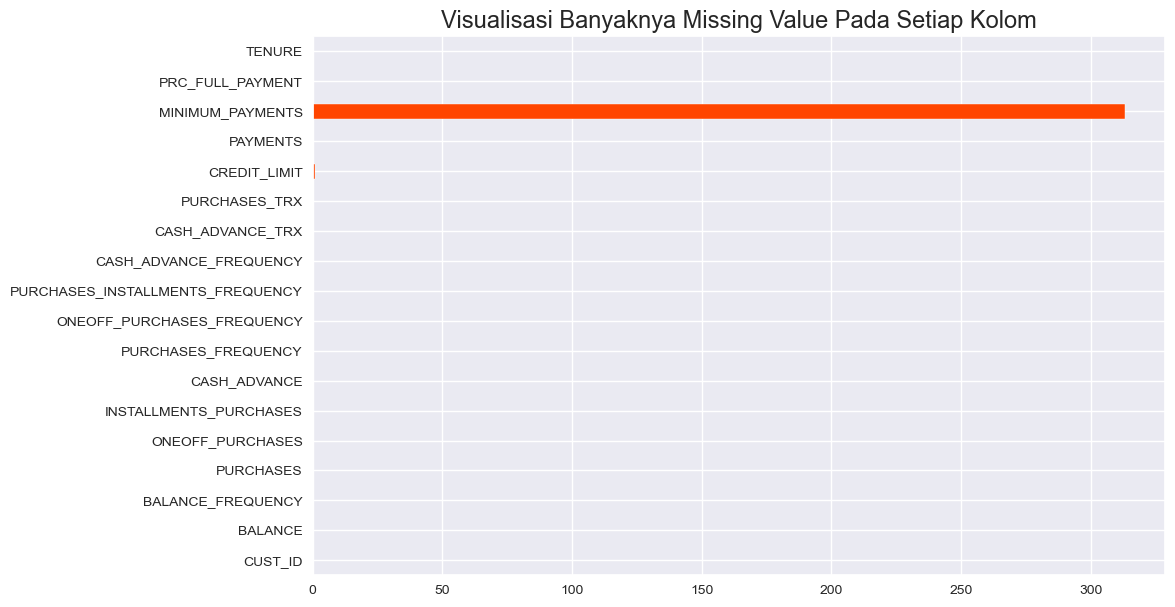

In [145]:
df.isnull().sum().plot.barh(figsize = (11,7), color="orangered")
plt.title("Visualisasi Banyaknya Missing Value Pada Setiap Kolom", fontsize=17)
plt.show()

##### Mengisi missing values pada kolom dengan median

In [146]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [147]:
df.isnull().values.any()

False

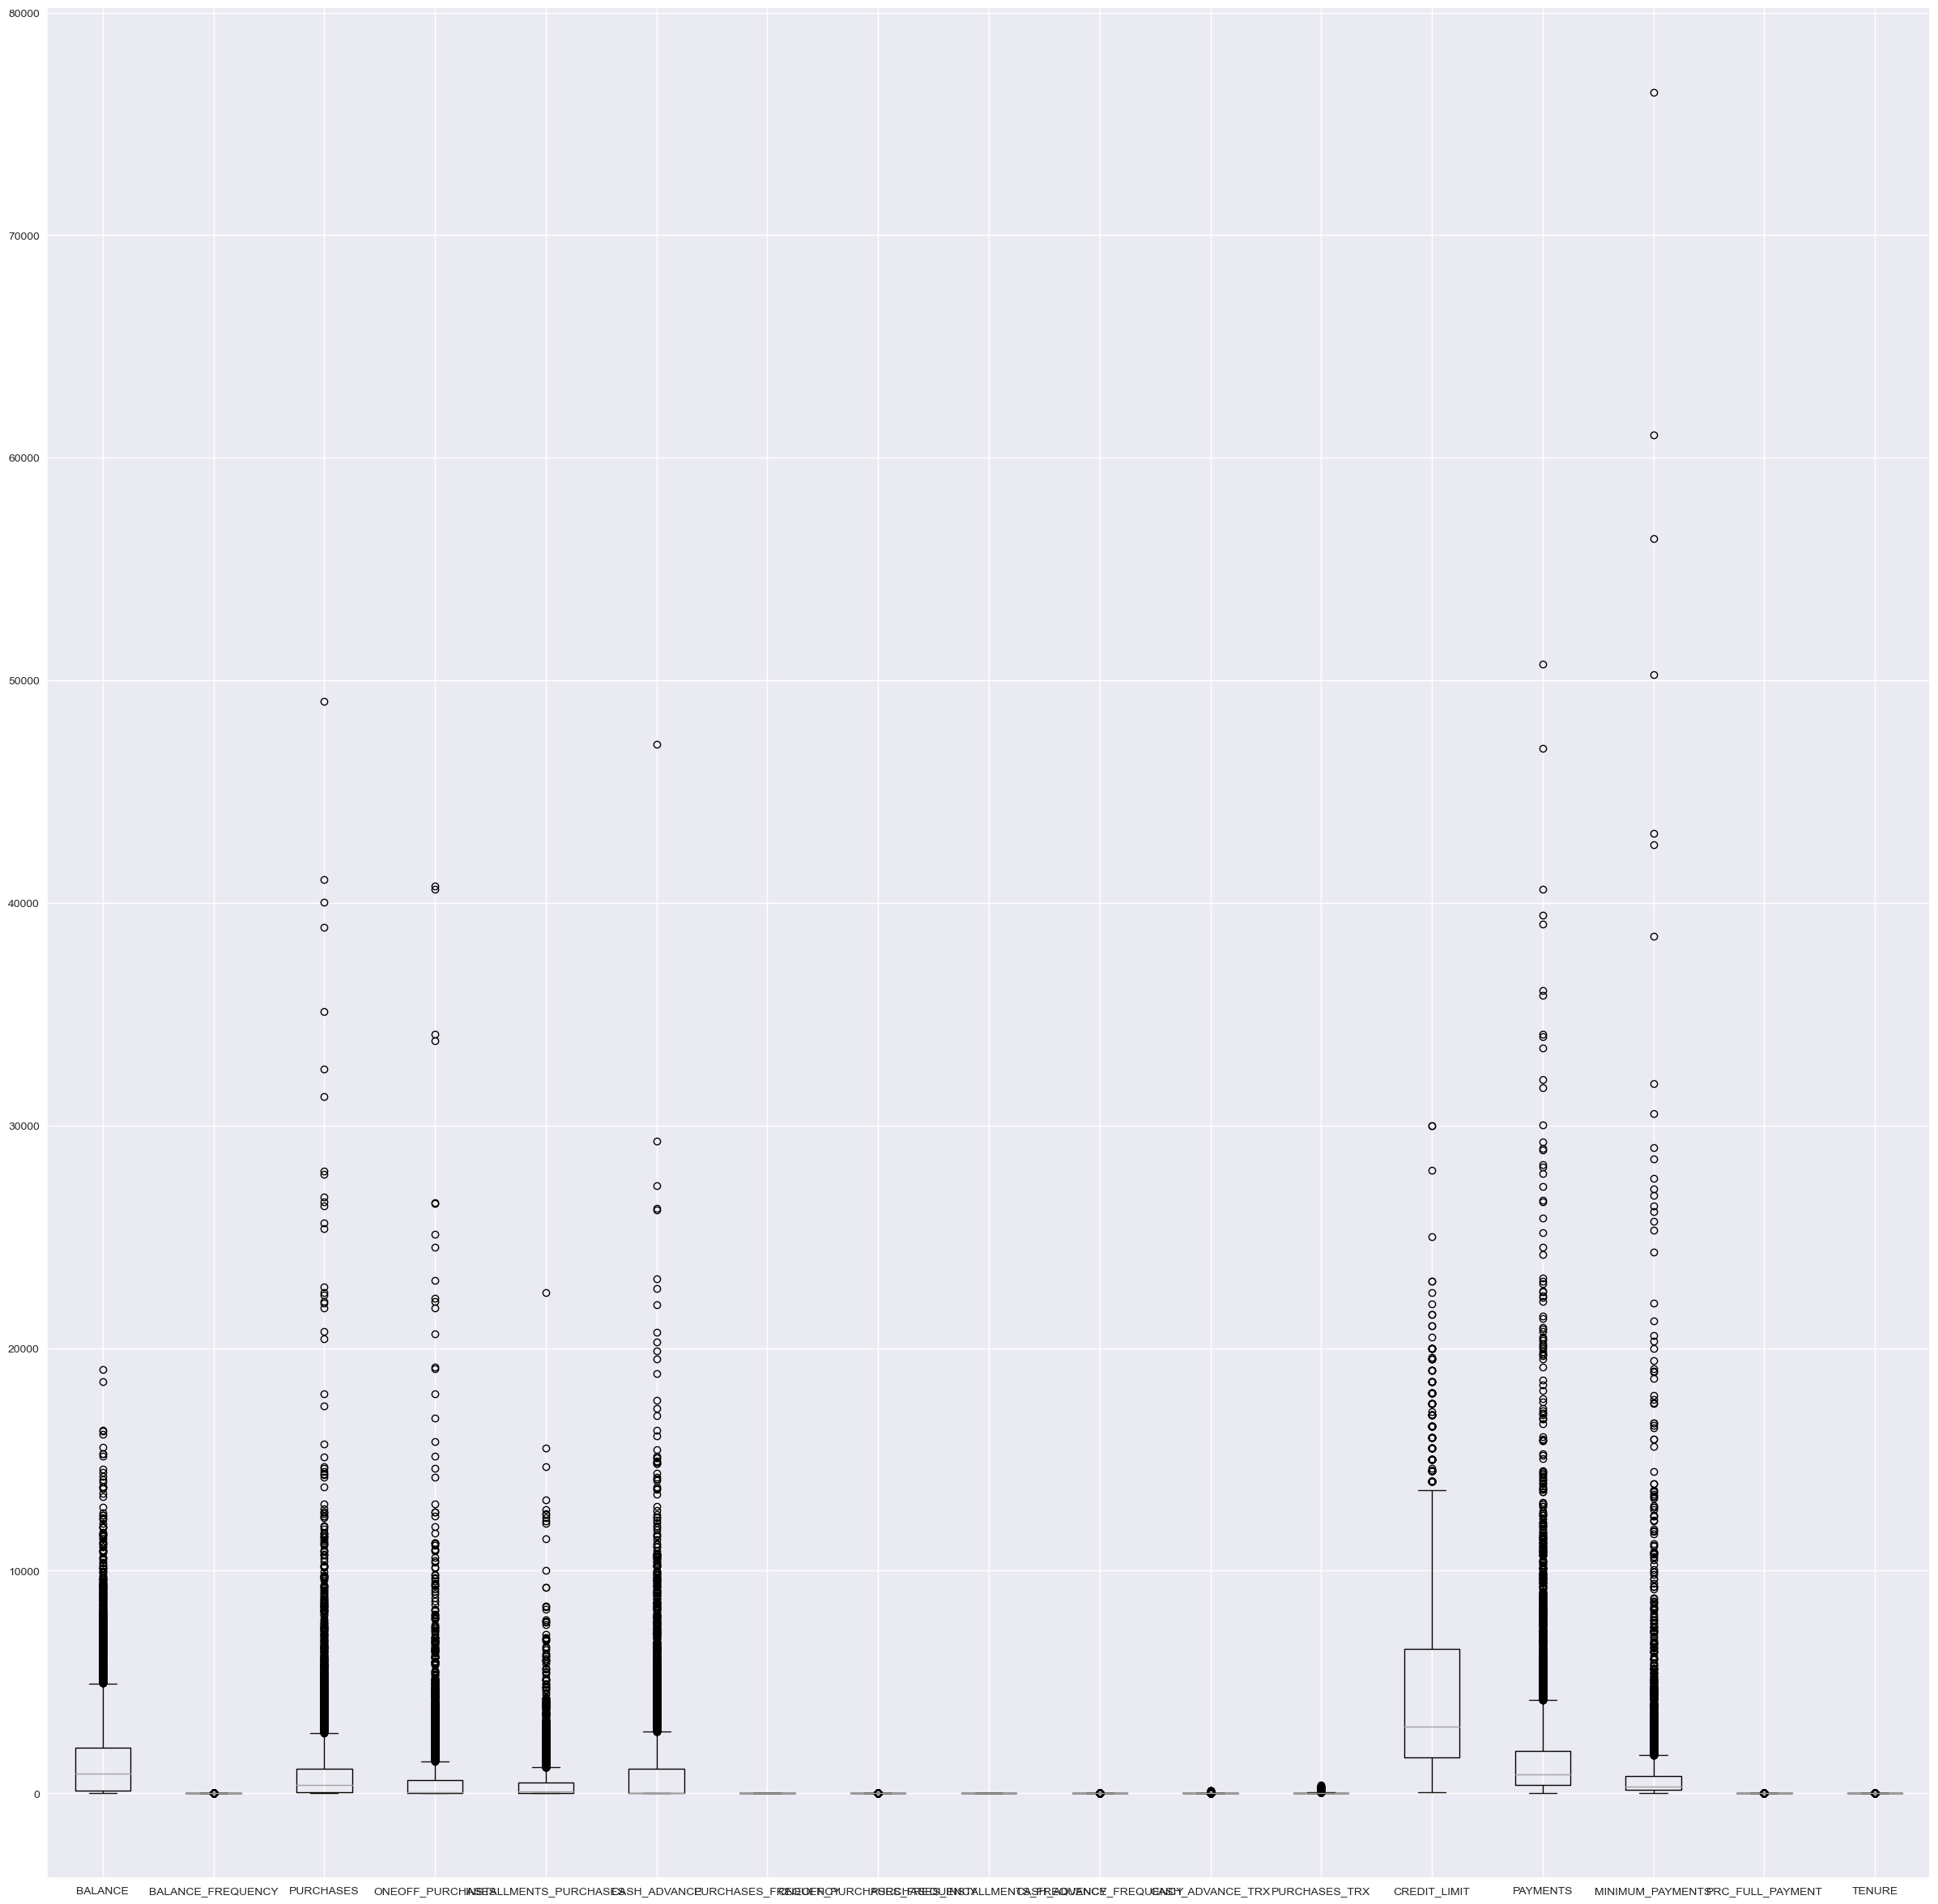

In [148]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

- Boxplot menunjukkan bahwa sebagian besar fitur masih memiliki nilai outlier yang banyak.

##### Outlier Treatment untuk menghilangkan outlier dari fitur

In [149]:
features_with_outliers = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                          'CREDIT_LIMIT', 'PAYMENTS','CASH_ADVANCE_TRX','PURCHASES_TRX', 'MINIMUM_PAYMENTS']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

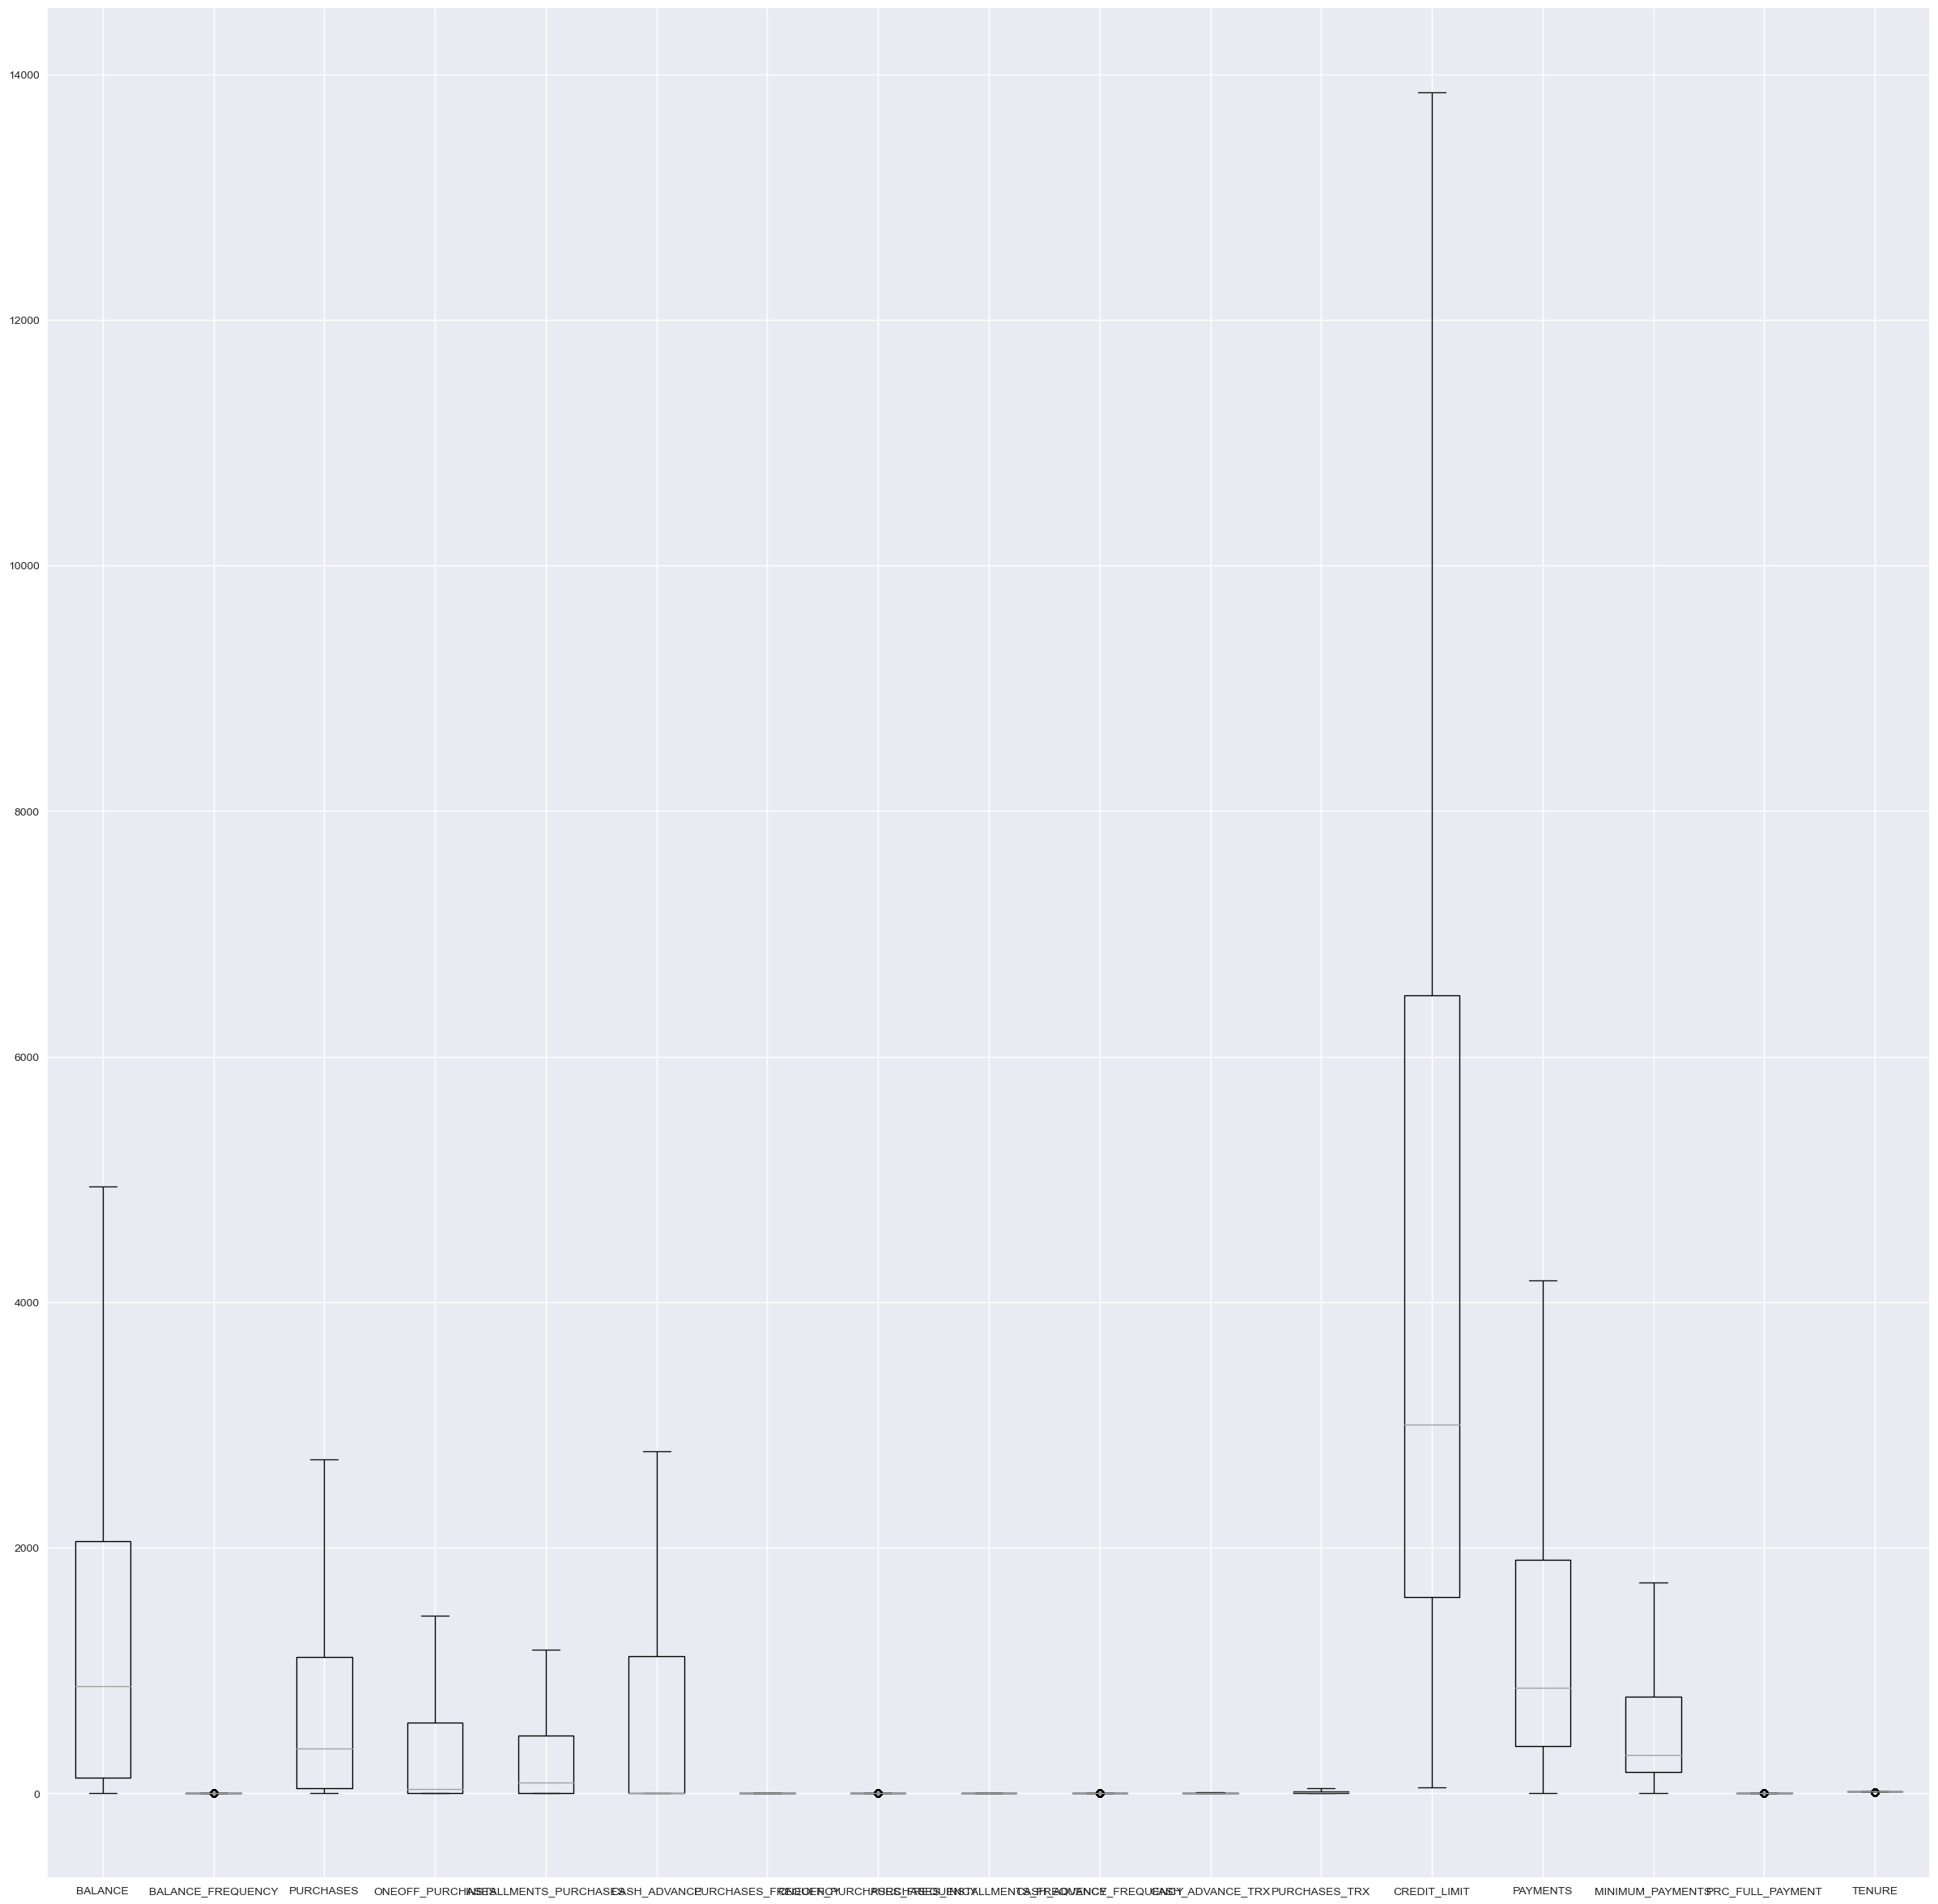

In [150]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

##### Menghapus kolom yang tidak diperlukan

In [151]:
# Drop CUST_ID karna tidak berpengaruh pada proses clustering
df.drop('CUST_ID', axis=1, inplace=True)

##### Melihat banyaknya nilai dari setiap atribut

In [152]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('='*70)

BALANCE : 
4942.927215    695
0.000000        80
40.900749        1
1621.219401      1
14.042241        1
              ... 
240.814517       1
432.058764       1
2852.354665      1
1941.315169      1
372.708075       1
Name: BALANCE, Length: 8177, dtype: int64
BALANCE_FREQUENCY : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.250000       8
0.100000       8
0.285714       8
0.142857       7
0.444444       7
0.166667       7
0.600000       6
0.222222       5
0.428571       5
0.1

#### ANALISIS
Dari hasil pengecekan, dapat diketahui bahwa nilai missing value terdapat pada kolom `CREDIT_LIMIT` dengan jumlah 1 baris dan kolom dan `MINIMUM_PAYMENTS` dengan jumlah 313 baris. Pada bagian ini, kami juga membuat visualisasi banyaknya missing value. Setelah dilakukan penanganan missing value didapakan sudah tidak ada missing value lagi pada dataset. Dan pada bagian ini juga dapat dilihat bahwa tidak ada duplikasi data pada dataset.

## 5. Explorasi Data
***
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

##### a. Mencari Pembayaran minimal dan maksimal untuk Tenure layanan kartu kredit untuk pengguna 12 bulan

In [153]:
df.loc[df['TENURE'] == 12, 'PAYMENTS'].agg(('min', 'max'))

min       0.000000
max    4177.921543
Name: PAYMENTS, dtype: float64

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa dengan untuk Jangka waktu layanan kartu kredit untuk pengguna 12 bulan pembayaran minimal yaitu 0 dan pembayaran maksimal yaitu 50721.48336 (50721).

##### b. Mencari Uang Muka terbesar dan terkecil

In [154]:
df.max(axis=0)['CASH_ADVANCE']

2784.5528481250003

In [155]:
df.min(axis=0)['CASH_ADVANCE']

0.0

**Kesimpulan :** didapatkan uang muka terbesar yaitu 47137.21176 dan uang muka terkecil yaitu 0.

##### c. Melihat proporsi data pada kolom Jangka Waktu dan Frekuensi Saldo dengan menggunakan crosstab

In [156]:
pd.crosstab(df.TENURE, df.BALANCE_FREQUENCY)

BALANCE_FREQUENCY,0.000000,0.090909,0.100000,0.111111,0.125000,0.142857,0.166667,0.181818,0.200000,0.222222,0.250000,0.272727,0.285714,0.300000,0.333333,0.363636,0.375000,0.400000,0.428571,0.444444,0.454545,0.500000,0.545455,0.555556,0.571429,0.600000,0.625000,0.636364,0.666667,0.700000,0.714286,0.727273,0.750000,0.777778,0.800000,0.818182,0.833333,0.857143,0.875000,0.888889,0.900000,0.909091,1.000000
TENURE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,7,0,0,0,0,0,0,0,14,0,0,0,0,0,0,16,0,0,0,0,0,0,28,0,0,0,0,0,0,0,60,0,0,0,0,0,79
7,3,0,0,0,0,7,0,0,0,0,0,0,8,0,0,0,0,0,5,0,0,0,0,0,19,0,0,0,0,0,15,0,0,0,0,0,0,51,0,0,0,0,82
8,1,0,0,0,9,0,0,0,0,0,8,0,0,0,0,0,9,0,0,0,0,13,0,0,0,0,11,0,0,0,0,0,17,0,0,0,0,0,57,0,0,0,71
9,2,0,0,5,0,0,0,0,0,5,0,0,0,0,8,0,0,0,0,7,0,0,0,10,0,0,0,0,9,0,0,0,0,22,0,0,0,0,0,53,0,0,54
10,1,0,8,0,0,0,0,0,9,0,0,0,0,9,0,0,0,10,0,0,0,11,0,0,0,6,0,0,0,13,0,0,0,0,20,0,0,0,0,0,55,0,94
11,3,0,0,0,0,0,0,5,0,0,0,8,0,0,0,9,0,0,0,0,6,0,15,0,0,0,0,7,0,0,0,13,0,0,0,19,0,0,0,0,0,99,181
12,70,67,0,0,0,0,0,141,0,0,0,143,0,0,0,161,0,0,0,0,166,0,204,0,0,0,0,202,0,0,0,210,0,0,0,259,0,0,0,0,0,311,5650


##### d. Mengidentifikasi rata-rata (mean) Pembelian dengan melakukan grouping berdasarkan Jangka Waktu.

In [157]:
df_mean = df[['TENURE','PURCHASES']].groupby('TENURE').mean().sort_values(by='PURCHASES', ascending=False)
df_mean.T

TENURE,12,10,9,11,8,7,6
PURCHASES,785.714511,534.25786,517.442871,486.561534,438.274643,409.270382,395.745711


**Kesimpulan :** Dari hasil diatas, maka dapat kita ketahui bahwa jangka waktu layanan kartu kredit untuk pengguna 12 bulan memiliki rata-rata pembelian terbesar yaitu 1088.192402 dan Jangka waktu layanan kartu kredit untuk pengguna 7 bulan memiliki rata-rata pembelian terkecil yaitu 424.559421.

##### e. Melihat data histori top 5 record dengan melakukan query, yang di mana:
- Jangka Waktu yaitu 12
- Banyak saldo 0
- Pembelian sebesar 0

In [158]:
df[
    (df['TENURE'] == 12) &
    (df['BALANCE'] == 0.0) &
    (df['PURCHASES'] == 0.0) 
].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
654,0.0,0.0,0.0,0.0,0.0,310.888779,0.0,0.0,0.0,0.083333,1,0,9000.0,0.000000,312.343947,0.0,12
4021,0.0,0.0,0.0,0.0,0.0,181.649790,0.0,0.0,0.0,0.083333,1,0,2500.0,1140.957855,312.343947,0.0,12
5107,0.0,0.0,0.0,0.0,0.0,465.571691,0.0,0.0,0.0,0.083333,1,0,3000.0,4177.921543,312.343947,0.0,12
6052,0.0,0.0,0.0,0.0,0.0,72.388903,0.0,0.0,0.0,0.083333,1,0,3000.0,197.845282,312.343947,0.0,12
6878,0.0,0.0,0.0,0.0,0.0,100.519930,0.0,0.0,0.0,0.083333,1,0,2000.0,0.000000,312.343947,0.0,12


### Visualisasi line plot Jangka waktu layanan kartu kredit untuk pengguna dan Batas Kredit

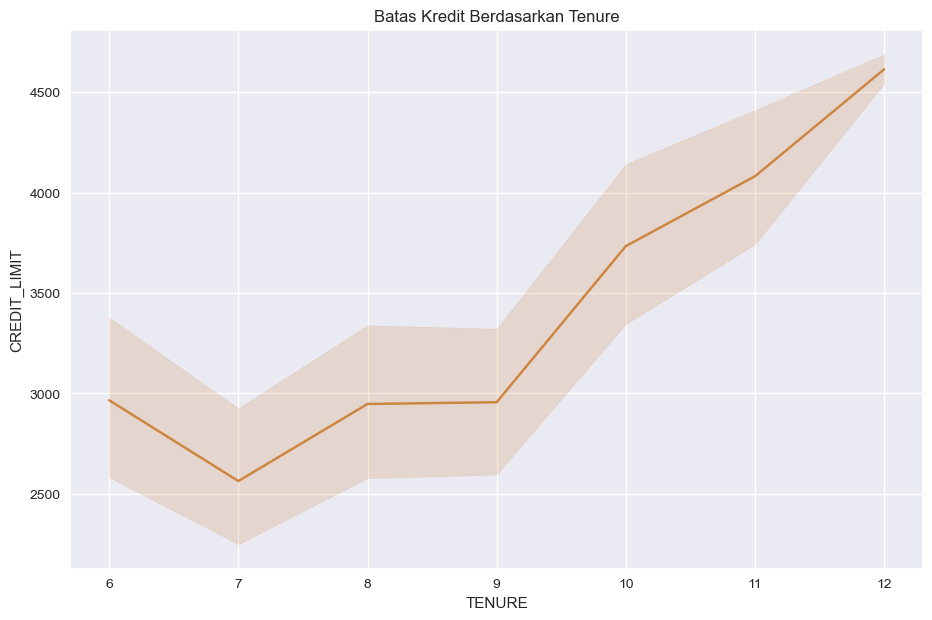

In [159]:
plt.figure(figsize=(11,7))
sns.lineplot('TENURE','CREDIT_LIMIT', color='peru', data=df)
plt.title('Batas Kredit Berdasarkan Tenure')
plt.show()

**Kesimpulan :** Dari hasil visualisasi lineplot diatas maka dapat disimpulkan bahwa batas kredit dalam jangka waktu layanan kartu kredit cenderung mengalami kenaikan di tiap bulannya. Batas kredit tertinggi yaitu pada jangka waktu layanan kartu kredit untuk pengguna 12 bulan.

### Visualisasi Bar Plot persebaran data kolom Jangka waktu layanan kartu kredit untuk pengguna

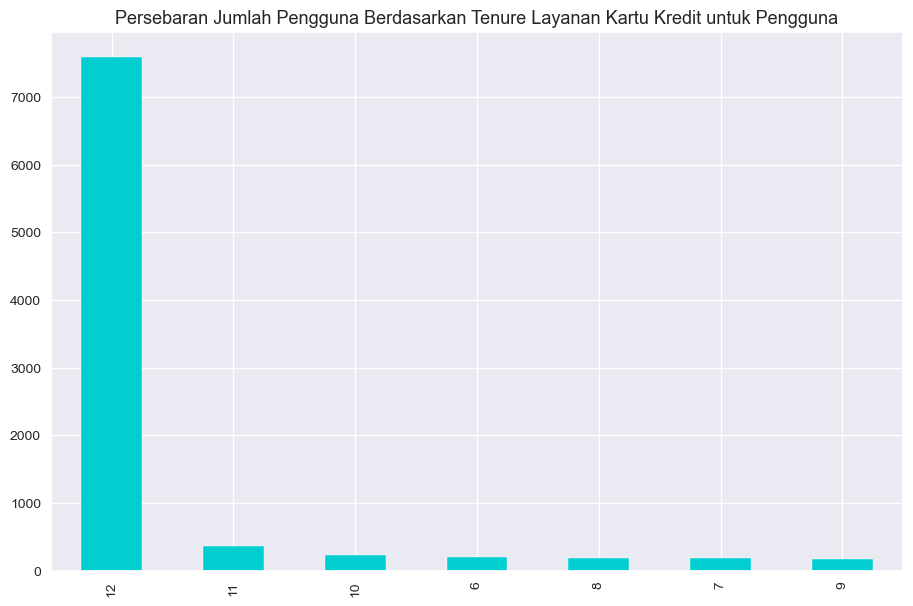

In [160]:
df['TENURE'].value_counts().plot.bar(color='darkturquoise', figsize=(11,7))
plt.title('Persebaran Jumlah Pengguna Berdasarkan Tenure Layanan Kartu Kredit untuk Pengguna', fontsize=(13))
plt.show()

**Kesimpulan :** Dari hasil visualisasi bar plot diatas, dapat dilihat bahwa persebaran data jumlah pengguna dengan Jangka waktu layanan kartu kredit untuk pengguna 12 bulan sangat banyak dengan jumlah diatas 7000, sedangakan jumlah pengguna dengan Jangka waktu layanan kartu kredit untuk pengguna 9 - 11 bulan rata-rata ada diangka kurang dari 1000.

### Visualisasi boxplot perbandingan Jangka waktu layanan kartu kredit untuk pengguna dan Batas Kredit

Text(0.5, 1.0, 'Tenure vs Pembayaran')

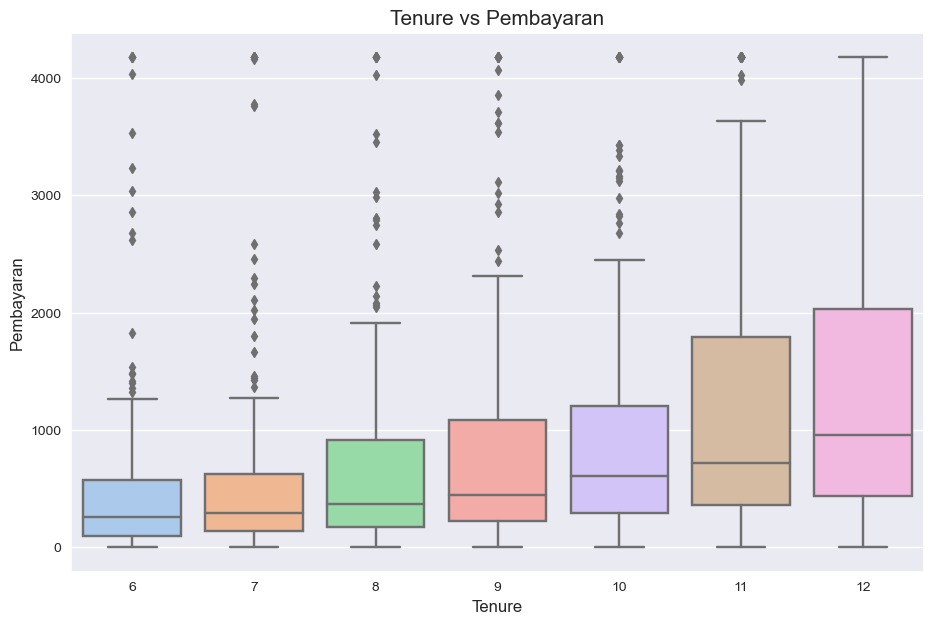

In [161]:
fig, ax = plt.subplots(figsize=(11, 7))

sns.boxplot(x='TENURE', y='PAYMENTS', data=df, palette="pastel")

plt.xlabel("Tenure", fontsize= 12)
plt.ylabel("Pembayaran", fontsize= 12)
plt.title("Tenure vs Pembayaran", fontsize= 15)

**Kesimpulan :** Dari visualisasi box plot diatas, dapat dilihat Jangka waktu layanan kartu kredit untuk pengguna selama 6-11 bulan memiliki outliers. Untuk Jangka waktu layanan kartu kredit untuk pengguna selama 12 bulan tidak memiliki outlier dan Jangka waktu layanan kartu kredit untuk pengguna selama 11 bulan memiliki outliers paling sedikit.

### Visualisasi korelasi antar variabel untuk melihat hubungan

In [162]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.379129,0.095805,0.124043,0.009457,0.557393,-0.108922,0.072095,-0.096473,0.485531,0.500925,0.057123,0.488555,0.350558,0.833313,-0.375336,0.075417
BALANCE_FREQUENCY,0.379129,1.000000,0.198280,0.157486,0.172158,0.126291,0.229715,0.202415,0.176079,0.191873,0.186107,0.244463,0.102552,0.153270,0.320711,-0.095082,0.119776
PURCHASES,0.095805,0.198280,1.000000,0.830603,0.706135,-0.177093,0.631891,0.665280,0.488919,-0.190639,-0.190023,0.808546,0.330448,0.501153,0.083199,0.220938,0.120207
ONEOFF_PURCHASES,0.124043,0.157486,0.830603,1.000000,0.286764,-0.116870,0.408137,0.796128,0.152872,-0.114349,-0.117956,0.622341,0.321507,0.422124,0.056679,0.102273,0.087002
INSTALLMENTS_PURCHASES,0.009457,0.172158,0.706135,0.286764,1.000000,-0.185467,0.688315,0.244307,0.780193,-0.202935,-0.200208,0.725475,0.191961,0.324137,0.060867,0.252636,0.111298
CASH_ADVANCE,0.557393,0.126291,-0.177093,-0.116870,-0.185467,1.000000,-0.319499,-0.136967,-0.264589,0.743941,0.801425,-0.203801,0.258440,0.331303,0.436769,-0.238062,-0.099027
PURCHASES_FREQUENCY,-0.108922,0.229715,0.631891,0.408137,0.688315,-0.319499,1.000000,0.501343,0.862934,-0.308478,-0.315382,0.795194,0.118251,0.163930,-0.044583,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.072095,0.202415,0.665280,0.796128,0.244307,-0.136967,0.501343,1.000000,0.142329,-0.111716,-0.124954,0.641734,0.296853,0.336476,0.012479,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.096473,0.176079,0.488919,0.152872,0.780193,-0.264589,0.862934,0.142329,1.000000,-0.262958,-0.264110,0.700146,0.057795,0.120975,-0.018863,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.485531,0.191873,-0.190639,-0.114349,-0.202935,0.743941,-0.308478,-0.111716,-0.262958,1.000000,0.902101,-0.199252,0.141711,0.220478,0.371088,-0.249773,-0.133372


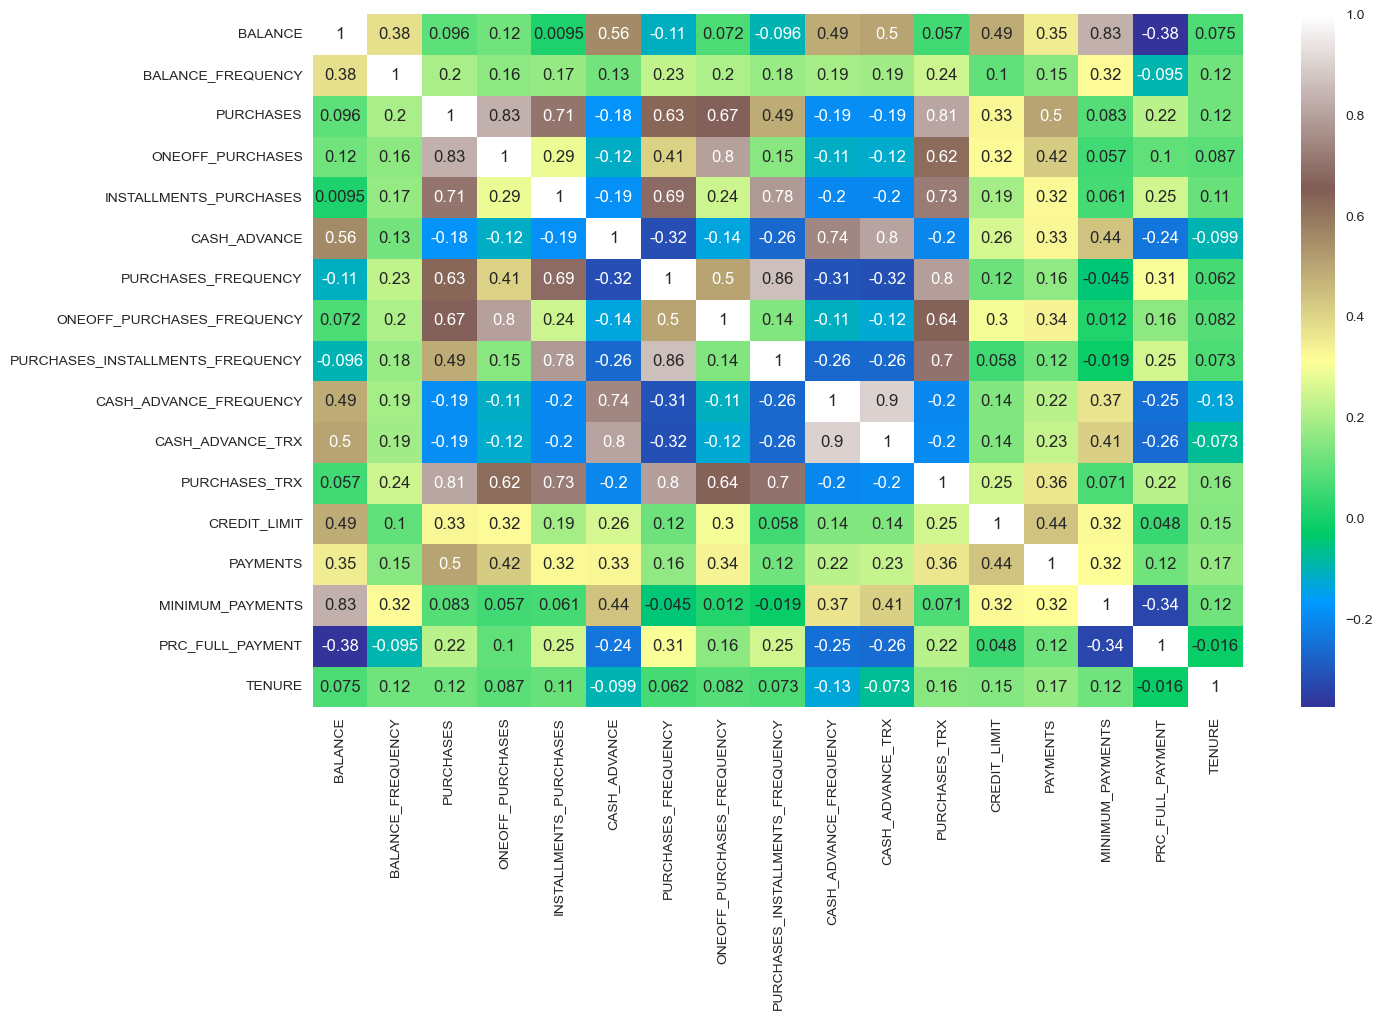

In [163]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()

Dalam heatmap tersebut, terlihat bahwa terdapat kolerasi yang cukup tinggi antar kolom diantaranya :

- Kolom CASH_ADVANCE_FREQUENCY dengan kolom CASH_ADVANCE_TRX dengan korelasi 0.9
- Kolom PURCHASES_FREQUENCY dengan kolom PURCHASES_INSTALLMENTS_FREQUENCY dengan korelasi 0.86
- Kolom PURCHASES dengan kolom ONEOFF_PURCHASES dengan korelasi 0.83

Dalam heatmap tersebut, juga terlihat bahwa terdapat kolerasi yang cukup rendah antar kolom diantaranya :

- Kolom BALANCE dengan kolom PRC_FULL_PAYMENT dengan korelasi -0.38
- Kolom MINIMUM_PAYMENTS dengan kolom PRC_FULL_PAYMENT dengan korelasi -0.34
- Kolom PURCHASES_FREQUENCY dengan kolom CASH_ADVANCE_TRX dengan korelasi -0.32

## 6. Data Preprocessing
***
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Standardize & Normalize Data

In [164]:
scaller = StandardScaler()
df = scaller.fit_transform(df)

In [165]:
normalized = normalize(df) 

In [166]:
normalized.shape

(8950, 17)

In [167]:
X_fit = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
        'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
        'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT','PAYMENTS',
        'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
df_normalized = pd.DataFrame(normalized,columns=X_fit)
df_normalized.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.301026,-0.085537,-0.250227,-0.237435,-0.173251,-0.230962,-0.276565,-0.232729,-0.242555,-0.231593,-0.239118,-0.253067,-0.346526,-0.308583,-0.268879,-0.180224,0.123686
1,0.276587,0.031524,-0.196704,-0.162492,-0.175082,0.496440,-0.286728,-0.159272,-0.215205,0.134700,0.111027,-0.209183,0.179008,0.508181,0.227383,0.054970,0.084646
2,0.188118,0.135647,0.010723,0.214256,-0.195329,-0.176341,0.332476,0.699976,-0.240092,-0.176823,-0.182568,0.007553,0.238399,-0.149149,0.034703,-0.137602,0.094435
3,0.050582,-0.286375,0.243935,0.599277,-0.210082,-0.131620,-0.285578,-0.112449,-0.258226,-0.072910,-0.113963,-0.229406,0.256405,-0.298051,-0.129336,-0.147995,0.101568
4,-0.130963,0.182117,-0.288236,-0.232398,-0.262245,-0.236752,-0.356486,-0.140369,-0.322343,-0.237399,-0.245113,-0.286367,-0.334435,-0.184704,-0.206074,-0.184742,0.126786


## 7. Pendefinisian Model
***
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. seperti penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

* ### Pendefinisian model yang kami gunakan ialah algoritma K-Means

#### Pemilihan Cluster

In [168]:
inertia = []
I = range(1,11)
for i in I:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df_normalized)
    inertia.append(model.inertia_)
    
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 11)])
inertia_df

,Inertia
1,8843.247326
2,6810.758117
3,5732.907998
4,4986.174519
5,4536.077740
6,4251.264247
7,4026.408630
8,3802.386639
9,3620.055945
10,3456.591755


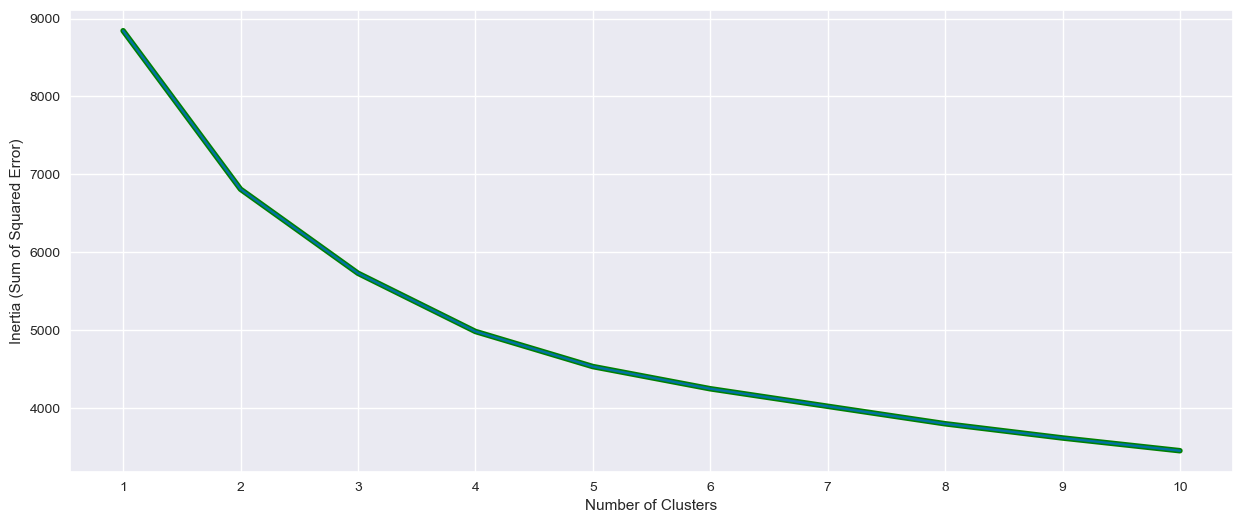

In [169]:
fig = plt.figure(figsize = (15,6))
plt.plot(range(1,11), inertia, linewidth=4, markersize=12, color = 'green')
plt.xticks(np.arange(11))
plt.ylabel('Inertia (Sum of Squared Error)')
plt.xlabel('Number of Clusters')
plt.plot(I, inertia, 'bx-')
plt.show()

- Nilai inertia menunjukkan bahwa terdapat lekukan tajam di angka 3-5 dan k kluster optimal yang dapat dipilih yakni 4 kluster. Dalam memilih banyaknya kluster harus mempertimbangkan computation cost, sehingga dipilih banyaknya k kluster yakni 4 kluster.

In [170]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42)
model.fit(df_normalized)

KMeans(n_clusters=4, random_state=42)

In [171]:
print("Labels", model.labels_)

Labels [3 1 2 ... 0 3 2]


In [172]:
print("Centroids", model.cluster_centers_)

Centroids [[-0.179041    0.02642349 -0.04457664 -0.16877452  0.15539265 -0.17801942
   0.25735548 -0.15233692  0.31565181 -0.17095834 -0.17740489  0.06315563
  -0.12980386 -0.14564105 -0.11712718  0.11409403  0.01083818]
 [ 0.198943    0.0795207  -0.14453762 -0.1063607  -0.13390612  0.2858099
  -0.18406131 -0.10259715 -0.15428941  0.26109358  0.2906308  -0.15232602
   0.04898724  0.06215831  0.1611407  -0.10327613 -0.00627796]
 [ 0.02997077  0.08133616  0.27393131  0.29212581  0.13505616 -0.07439233
   0.18846426  0.28259801  0.08895501 -0.07476601 -0.07641334  0.23937745
   0.10140231  0.12637722  0.015188    0.02945581  0.05359119]
 [-0.14442055 -0.11937229 -0.19507528 -0.12075718 -0.20574897 -0.13731237
  -0.25978478 -0.12303225 -0.23526127 -0.11326688 -0.13058266 -0.22424123
  -0.14787521 -0.18259798 -0.14144767 -0.09835924  0.02389794]]


In [173]:
centroids = model.cluster_centers_
df_cluster = df_normalized.copy()
df_cluster["CLUSTER"] = model.fit_predict(df_normalized)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,-0.301026,-0.085537,-0.250227,-0.237435,-0.173251,-0.230962,-0.276565,-0.232729,-0.242555,-0.231593,-0.239118,-0.253067,-0.346526,-0.308583,-0.268879,-0.180224,0.123686,3
1,0.276587,0.031524,-0.196704,-0.162492,-0.175082,0.496440,-0.286728,-0.159272,-0.215205,0.134700,0.111027,-0.209183,0.179008,0.508181,0.227383,0.054970,0.084646,1
2,0.188118,0.135647,0.010723,0.214256,-0.195329,-0.176341,0.332476,0.699976,-0.240092,-0.176823,-0.182568,0.007553,0.238399,-0.149149,0.034703,-0.137602,0.094435,2
3,0.050582,-0.286375,0.243935,0.599277,-0.210082,-0.131620,-0.285578,-0.112449,-0.258226,-0.072910,-0.113963,-0.229406,0.256405,-0.298051,-0.129336,-0.147995,0.101568,3
4,-0.130963,0.182117,-0.288236,-0.232398,-0.262245,-0.236752,-0.356486,-0.140369,-0.322343,-0.237399,-0.245113,-0.286367,-0.334435,-0.184704,-0.206074,-0.184742,0.126786,3


(array([1985.,    0.,    0., 2193.,    0.,    0., 2167.,    0.,    0.,
        2605.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

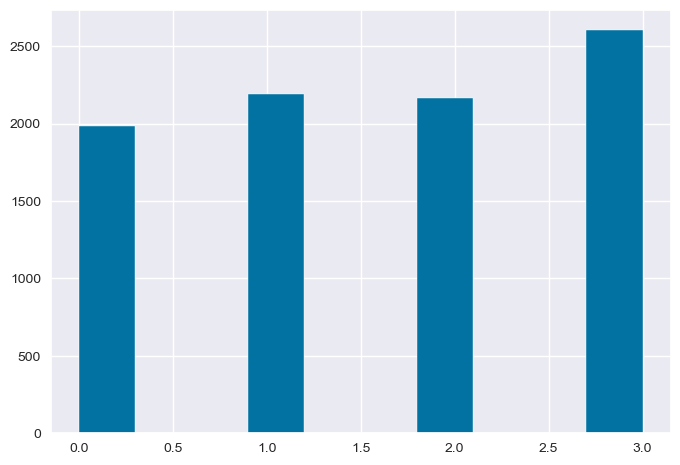

In [174]:
plt.hist(df_cluster['CLUSTER'])

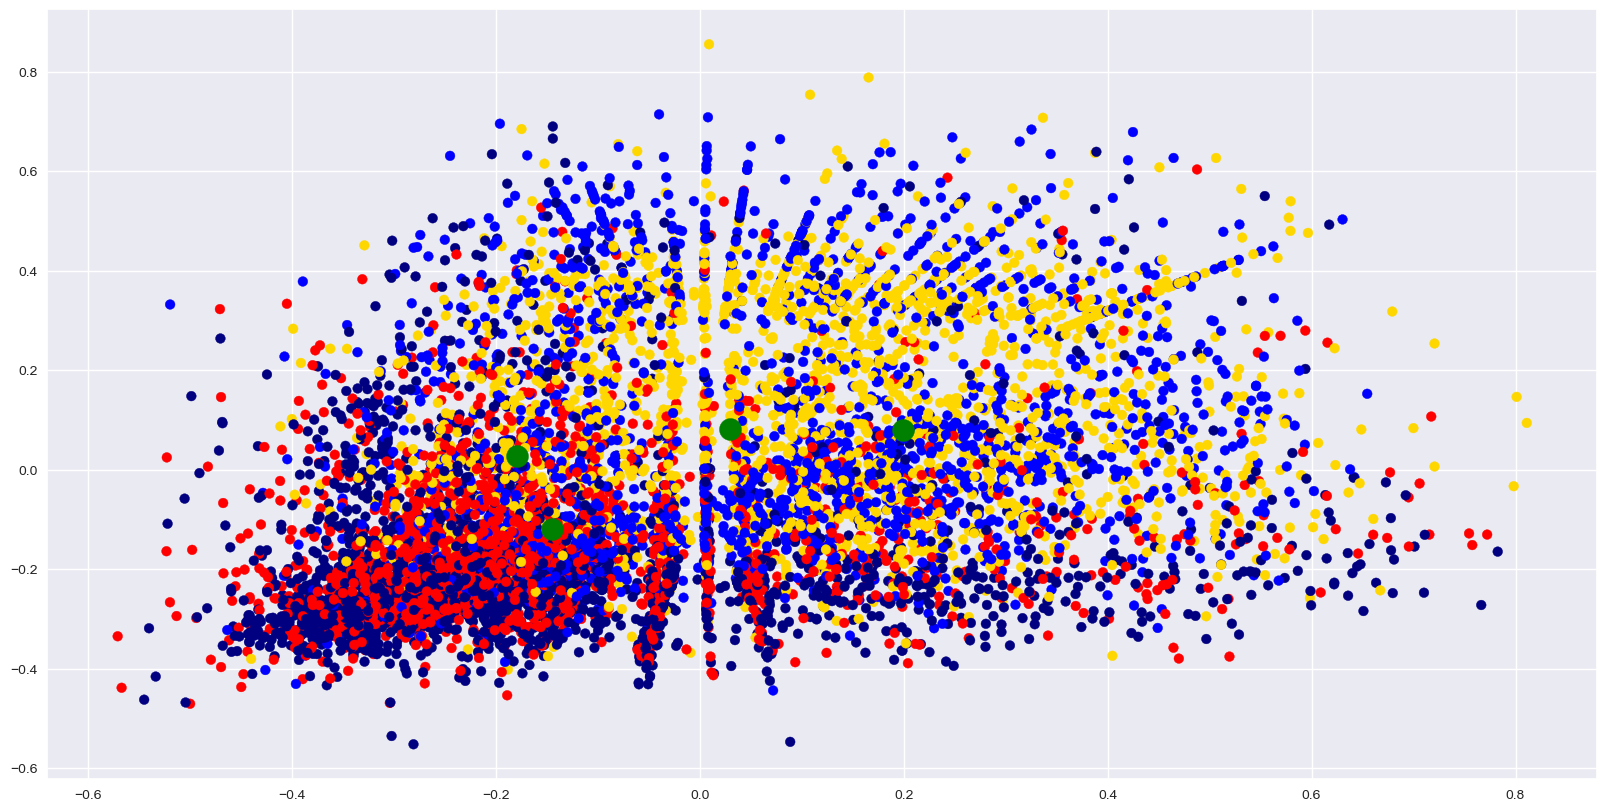

In [175]:
Color = ['red', 'blue', 'gold', 'navy']
df_cluster['Color'] = df_cluster['CLUSTER'].map(lambda p:Color[p])

plt.figure(figsize=(20, 10))
plt.scatter(df_normalized["CREDIT_LIMIT"],
           df_normalized["PAYMENTS"],
           c = df_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

#### Cluster Defining

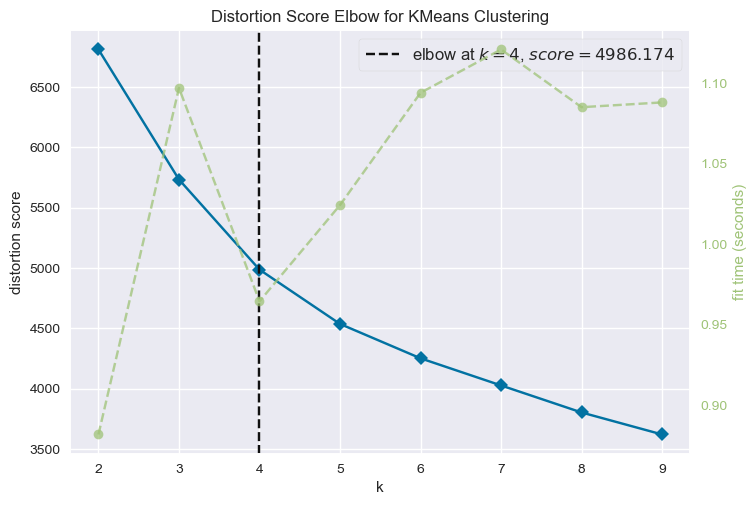

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [176]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(df_normalized)       
distortion_visualizer.show()

**Kesimpulan** : Memastikan jumlah cluster yang digunakan, kami juga menggunakan metode KElbowVisualizer untuk melihat jumlah kluster yang ideal untuk kami gunakan. Hasil dari penggunaan metode tersebut menujukkan bahwa kluster yang sesuai untuk digunakan adalah k=4.

In [177]:
labels = model.labels_
centroids = model.cluster_centers_
df_normalized['labels'] = labels

trace = go.Scatter3d(
                    x = df_normalized['TENURE'],
                    y = df_normalized['PAYMENTS'],
                    z = df_normalized['CREDIT_LIMIT'],
                    mode = 'markers',
                    marker=dict(color=df_normalized['labels'], size = 5, line=dict(color=df_normalized['labels'], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'TENURE'),
                                yaxis = dict(title = 'PAYMENTS'),
                                zaxis = dict(title = 'CREDIT LIMIT'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

In [178]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

**Kesimpulan** : Pada step ini kami menggunakan k=4 dan menggunakan penambahan 'k-means++' untuk memastikan inisialisasi sentroid yang lebih cerdas dan meningkatkan kualitas pengelompokan.

## 8. Pelatihan Model
***
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [179]:
km.fit(df_normalized)

KMeans(n_clusters=4, random_state=42)

## 9. Evaluasi Model
***
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [180]:
labels = km.labels_

In [181]:
df_normalized['Cluster_Labels_4'] = labels
df_normalized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels,Cluster_Labels_4
0,-0.301026,-0.085537,-0.250227,-0.237435,-0.173251,-0.230962,-0.276565,-0.232729,-0.242555,-0.231593,-0.239118,-0.253067,-0.346526,-0.308583,-0.268879,-0.180224,0.123686,7,1
1,0.276587,0.031524,-0.196704,-0.162492,-0.175082,0.496440,-0.286728,-0.159272,-0.215205,0.134700,0.111027,-0.209183,0.179008,0.508181,0.227383,0.054970,0.084646,6,1
2,0.188118,0.135647,0.010723,0.214256,-0.195329,-0.176341,0.332476,0.699976,-0.240092,-0.176823,-0.182568,0.007553,0.238399,-0.149149,0.034703,-0.137602,0.094435,2,0
3,0.050582,-0.286375,0.243935,0.599277,-0.210082,-0.131620,-0.285578,-0.112449,-0.258226,-0.072910,-0.113963,-0.229406,0.256405,-0.298051,-0.129336,-0.147995,0.101568,2,0
4,-0.130963,0.182117,-0.288236,-0.232398,-0.262245,-0.236752,-0.356486,-0.140369,-0.322343,-0.237399,-0.245113,-0.286367,-0.334435,-0.184704,-0.206074,-0.184742,0.126786,7,1


In [182]:
silhouette_score(df_normalized,km.labels_)

0.5929072266430532

**Kesimpulan** : Nilai silhouette score digunakan untuk melihat kualitas dan kekuatan cluster yaitu seberapa baik suatu objek ditempatkan dalam suatu cluster. Jika nilai silhouette mendekati nilai 1, maka semakin baik pengelompokan objeknya dalam satu cluster. Pada hasil pemodelan kami mendapatkan nilai silhouette sebesar **0.59**, maka dapat disimpulkan bahwa hasil tersebut tidak terlalu buruk.

In [183]:
df_out = df_normalized.groupby(by = 'Cluster_Labels_4').sum()[['PURCHASES','PAYMENTS','CREDIT_LIMIT','TENURE']].reset_index()
df_out.head()

,Cluster_Labels_4,PURCHASES,PAYMENTS,CREDIT_LIMIT,TENURE
0,0,592.222432,250.038388,195.422565,139.560151
1,1,-419.249644,-213.995523,-61.334403,212.278003
2,2,-264.594392,-78.298865,-189.662482,-330.982922
3,3,-228.546489,-312.373590,-260.151500,165.290300


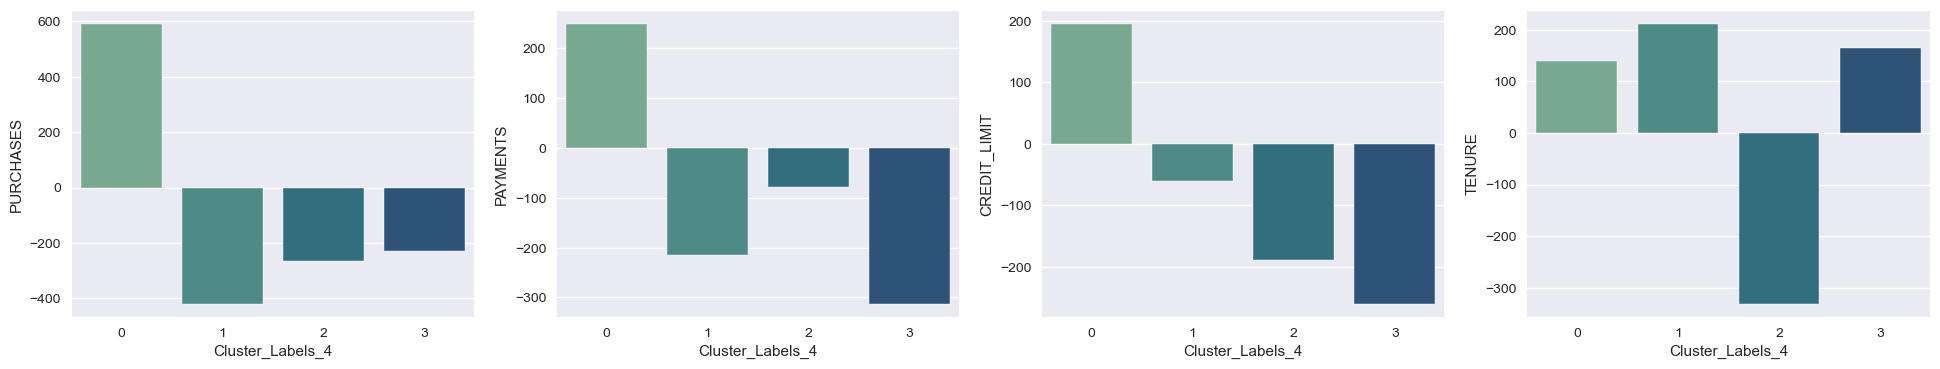

In [184]:
sns.set_style("darkgrid")
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.barplot(x= 'Cluster_Labels_4',y = 'PURCHASES', data = df_out, palette = 'crest', seed = 1234);
plt.subplot(1,4,2)
sns.barplot(x= 'Cluster_Labels_4',y = 'PAYMENTS', data = df_out, palette = 'crest', seed = 1234);
plt.subplot(1,4,3)
sns.barplot(x= 'Cluster_Labels_4',y = 'CREDIT_LIMIT', data = df_out, palette = 'crest', seed = 1234);
plt.subplot(1,4,4)
sns.barplot(x= 'Cluster_Labels_4',y = 'TENURE', data = df_out, palette = 'crest', seed = 1234);

**Kesimpulan** :    
- Cluster 0 : Memiliki jumlah tertinggi untuk Purchases, Payments, Credit_limit, dan sedang untuk Tenure
- Cluster 1 : Memiliki jumlah yang paling rendah untuk Purchases, Payments, & Credit_limit, dan tertinggi untuk Tenure
- Cluster 2 : Memiliki jumlah yang rendah untuk Purchases, Payments, Credit_limit, dan paling rendah untuk Tenure
- Cluster 3 : Memiliki jumlah yang rendah untuk Purchases, paling rendah untuk Payments & Credit_limit, dan sedang untuk Tenure




## 10. Model Inference
***
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [185]:
df_normalized

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels,Cluster_Labels_4
0,-0.301026,-0.085537,-0.250227,-0.237435,-0.173251,-0.230962,-0.276565,-0.232729,-0.242555,-0.231593,-0.239118,-0.253067,-0.346526,-0.308583,-0.268879,-0.180224,0.123686,7,1
1,0.276587,0.031524,-0.196704,-0.162492,-0.175082,0.496440,-0.286728,-0.159272,-0.215205,0.134700,0.111027,-0.209183,0.179008,0.508181,0.227383,0.054970,0.084646,6,1
2,0.188118,0.135647,0.010723,0.214256,-0.195329,-0.176341,0.332476,0.699976,-0.240092,-0.176823,-0.182568,0.007553,0.238399,-0.149149,0.034703,-0.137602,0.094435,2,0
3,0.050582,-0.286375,0.243935,0.599277,-0.210082,-0.131620,-0.285578,-0.112449,-0.258226,-0.072910,-0.113963,-0.229406,0.256405,-0.298051,-0.129336,-0.147995,0.101568,2,0
4,-0.130963,0.182117,-0.288236,-0.232398,-0.262245,-0.236752,-0.356486,-0.140369,-0.322343,-0.237399,-0.245113,-0.286367,-0.334435,-0.184704,-0.206074,-0.184742,0.126786,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.167983,0.098239,-0.096165,-0.131290,-0.002119,-0.127710,0.240788,-0.128688,0.223720,-0.128060,-0.132221,-0.081772,-0.191612,-0.152188,-0.180969,0.224501,-0.781759,0,2
8946,-0.174752,0.101504,-0.097383,-0.135653,0.002203,-0.131955,0.248791,-0.132965,0.231156,-0.132316,-0.136615,-0.084490,-0.197980,-0.164902,-0.089985,-0.102967,-0.807743,0,2
8947,-0.177001,-0.036920,-0.134158,-0.137823,-0.075945,-0.134065,0.170108,-0.135091,0.151376,-0.134432,-0.138800,-0.101105,-0.201146,-0.197973,-0.177431,0.065529,-0.820660,0,2
8948,-0.172452,-0.035712,-0.161379,-0.133311,-0.143640,-0.122627,-0.235237,-0.130669,-0.176558,0.030330,-0.021584,-0.171617,-0.223014,-0.195838,-0.181270,0.063384,-0.793797,0,2


In [186]:
cls_new = {'CUST_ID':[1,2,3,4,5],'BALANCE':[0.24,0.14,0.04,0.4,0.3],'BALANCE_FREQUENCY':[0.14,0.22,0.03,0.1,0.4],
           'PURCHASES':[0.09,0.3,0.45,0.5,0.22],'ONEOFF_PURCHASES':[0.02,0.22,0.14,0.06,0.07],
           'INSTALLMENTS_PURCHASES':[0.01,0.2,0.22,0.11,0.4],'CASH_ADVANCE':[0.72,0.8,0.12,0.2,0.09],
            'PURCHASES_FREQUENCY':[0.34,0.2,0.08,0.1,0.3],'ONEOFF_PURCHASES_FREQUENCY':[0.74,0.2,0.3,0.22,0.31],
            'PURCHASES_INSTALLMENTS_FREQUENCY':[0.2,0.1,0.4,0.15,0.12],'CASH_ADVANCE_FREQUENCY':[0.26,0.14,0.15,0.19,0.03],
            'CASH_ADVANCE_TRX':[0.03,0.01,0.4,0.1,0.14],'PURCHASES_TRX':[0.06,0.01,0.02,0.23,0.17], 
            'CREDIT_LIMIT':[0.2,0.32,0.1,0.22,0.13],'PAYMENTS':[0.32,0.12,0.22,0.15,0.01],
            'MINIMUM_PAYMENTS':[0.1,0.09,0.3,0.32,0.02],'PRC_FULL_PAYMENT':[0.01,0.2,0.12,0.3,0.4],
            'TENURE':[0.15,0.16,0.2,0.17,0.22]}
cls_new = pd.DataFrame(cls_new)
cls_new

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1,0.24,0.14,0.09,0.02,0.01,0.72,0.34,0.74,0.20,0.26,0.03,0.06,0.20,0.32,0.10,0.01,0.15
1,2,0.14,0.22,0.30,0.22,0.20,0.80,0.20,0.20,0.10,0.14,0.01,0.01,0.32,0.12,0.09,0.20,0.16
2,3,0.04,0.03,0.45,0.14,0.22,0.12,0.08,0.30,0.40,0.15,0.40,0.02,0.10,0.22,0.30,0.12,0.20
3,4,0.40,0.10,0.50,0.06,0.11,0.20,0.10,0.22,0.15,0.19,0.10,0.23,0.22,0.15,0.32,0.30,0.17
4,5,0.30,0.40,0.22,0.07,0.40,0.09,0.30,0.31,0.12,0.03,0.14,0.17,0.13,0.01,0.02,0.40,0.22


In [187]:
zscore = MinMaxScaler()
zscore.fit(cls_new)
df_clus= pd.DataFrame(zscore.transform(cls_new),columns = cls_new.columns)
df_clus.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,5.0,0.500000,0.395285,0.0,0.250000,0.500000,0.750000,1.0
BALANCE,5.0,0.511111,0.387697,0.0,0.277778,0.555556,0.722222,1.0
BALANCE_FREQUENCY,5.0,0.400000,0.383365,0.0,0.189189,0.297297,0.513514,1.0
PURCHASES,5.0,0.541463,0.408637,0.0,0.317073,0.512195,0.878049,1.0
ONEOFF_PURCHASES,5.0,0.410000,0.394335,0.0,0.200000,0.250000,0.600000,1.0
INSTALLMENTS_PURCHASES,5.0,0.456410,0.371308,0.0,0.256410,0.487179,0.538462,1.0
CASH_ADVANCE,5.0,0.416901,0.485824,0.0,0.042254,0.154930,0.887324,1.0
PURCHASES_FREQUENCY,5.0,0.476923,0.446552,0.0,0.076923,0.461538,0.846154,1.0
ONEOFF_PURCHASES_FREQUENCY,5.0,0.285185,0.409423,0.0,0.037037,0.185185,0.203704,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,5.0,0.313333,0.403870,0.0,0.066667,0.166667,0.333333,1.0


In [188]:
clus_new = km.predict(cls_new)
print(clus_new)

[2 2 2 2 2]


## 11. Pengambilan Kesimpulan
***
Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
- Dari bagian data cleaning, dapat diketahui bahwa nilai missing value terdapat pada kolom `CREDIT_LIMIT` dengan jumlah 1 baris dan kolom dan `MINIMUM_PAYMENTS` dengan jumlah 313 baris. Pada bagian ini, kami juga membuat visualisasi banyaknya missing value.
- Untuk mengatasi missing value pada dataset ini, kami menggunakan pengisian missing value dengan menggunakan median
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, barplot, scatter plot, dan matriks korelasi (heatmap) dan kami juga melakukan beberapa contoh groupby dan query terhadap data yang ada
- Hasil dari clustering yang telah kami lakukan, menunjukkan bahwa penggunaan kluster yang ideal adalah k=4. Kemudian setelah kami lakukan pemodelan, langkah selanjutnya kami evaluasi menggunakan Silhouette Score. Hasil dari evaluasi tersebut yaitu sebesar 0.59, yang dapat disimpulkan tidak terlalu buruk.
- Berdasarkan hasil pengamatan kami pada clustering yang telah dilakukan dengan menggunakan 4 atribut yaitu **Purchases, Payments, Credit_limit, dan Tenure**. Didapatkan hasil bahwa Cluster 0 mendominasi dibandingkan 3 cluster lainnya.